# Neural Networks for Almond Classification
#### Daniël van Zyl: u21446459
- Resilient Back propagation (RProp)

## Resilient Back Propagation
### Data pre-processing

#### Imports

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler

#### Read in data

In [4]:
data = pd.read_csv('./Almond.csv')

#### Basic Description of Data

In [5]:
data.head(1)

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [6]:
#Drop Unnamed Colounm
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(1)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [7]:
data.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


### Plots

In [8]:
def plot_histograms(data):
    data.hist(figsize=(8, 8), bins=30)
    plt.suptitle('Feature Distributions', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_heatmap(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
        
    plt.figure(figsize=(8, 8))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of correlations in the data', fontsize=12)
    plt.tight_layout()
    plt.show()

def get_num_categories(data):
    plt.figure(figsize=(4, 4))
    sns.countplot(x='Type', data=data, hue='Type', palette='Set1', legend=False)
    plt.title(f'Count of Each Category', fontsize=14)
    plt.xlabel('Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Distributions

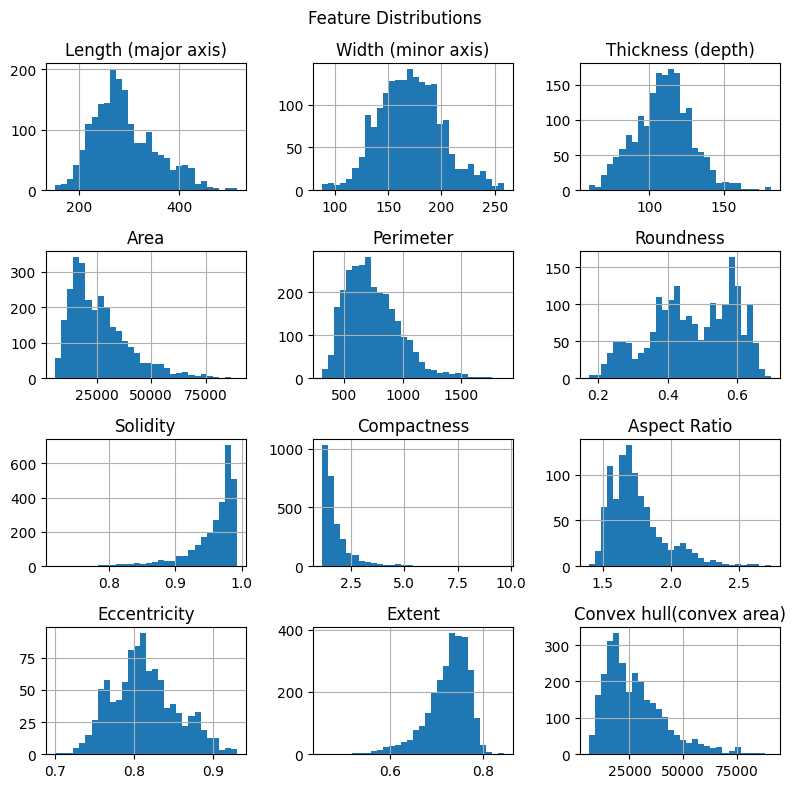

In [9]:
plot_histograms(data)

From the distrubution plots above we can see that very few attributes follow a normal distribution and therefore will have to use different techniques to handle the missing values.

#### Correlations

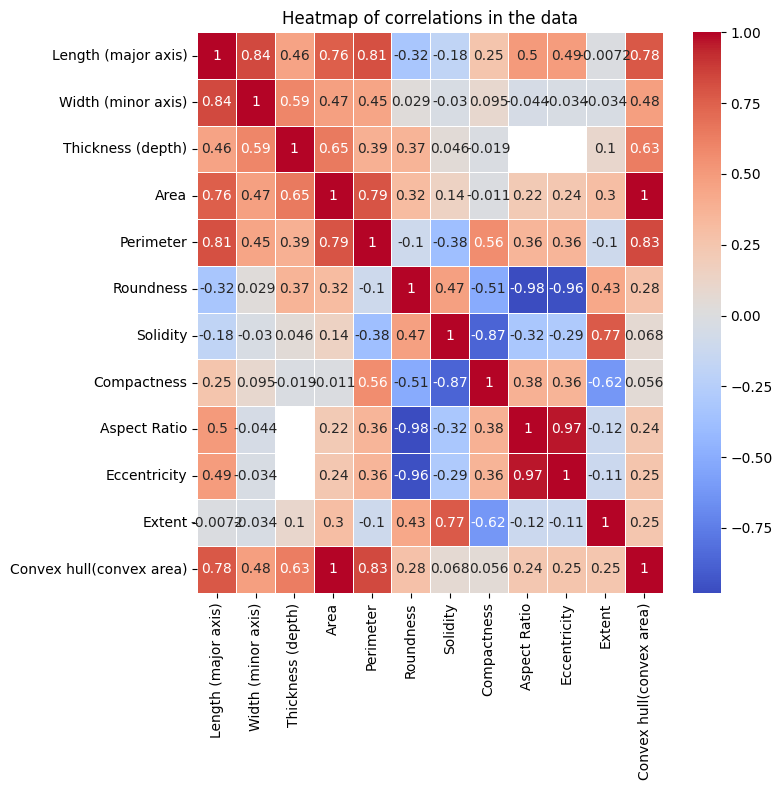

In [10]:
plot_heatmap(data)

#### Categories

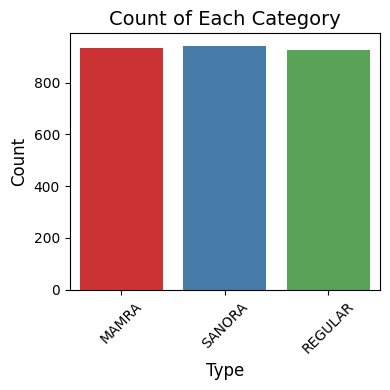

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

In [11]:
get_num_categories(data)
data['Type'].value_counts()

The number of categories is close therefore, the data set is balanced.

#### Handle Missing values

In [12]:
data.isnull().sum()

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [13]:
def handle_missing(data):
    imputer = KNNImputer(n_neighbors=5)
    columns_to_impute = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']
    
    updated_data = data.copy()
    updated_data[columns_to_impute] = imputer.fit_transform(updated_data[columns_to_impute])
    
    updated_data['Roundness'] = 4  * updated_data['Area'] / (np.pi * updated_data['Length (major axis)'] ** 2)
    updated_data['Aspect Ratio'] = updated_data['Length (major axis)'] / updated_data['Width (minor axis)']
    updated_data['Eccentricity'] = (1 - (updated_data['Width (minor axis)'] / updated_data['Length (major axis)']) ** 2)


    return updated_data

In [14]:
data_no_missing = handle_missing(data.copy())

In [15]:
data_no_missing.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

#### Handle Outliers

In [16]:
def visualise_outliers(data):
    features = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 
                'Area', 'Perimeter', 'Roundness', 'Solidity', 
                'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)']
    num_features = len(features)
    cols = 4  
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten() 
    
    for i, feature in enumerate(features):
        sns.boxplot(ax=axes[i], x=data[feature])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

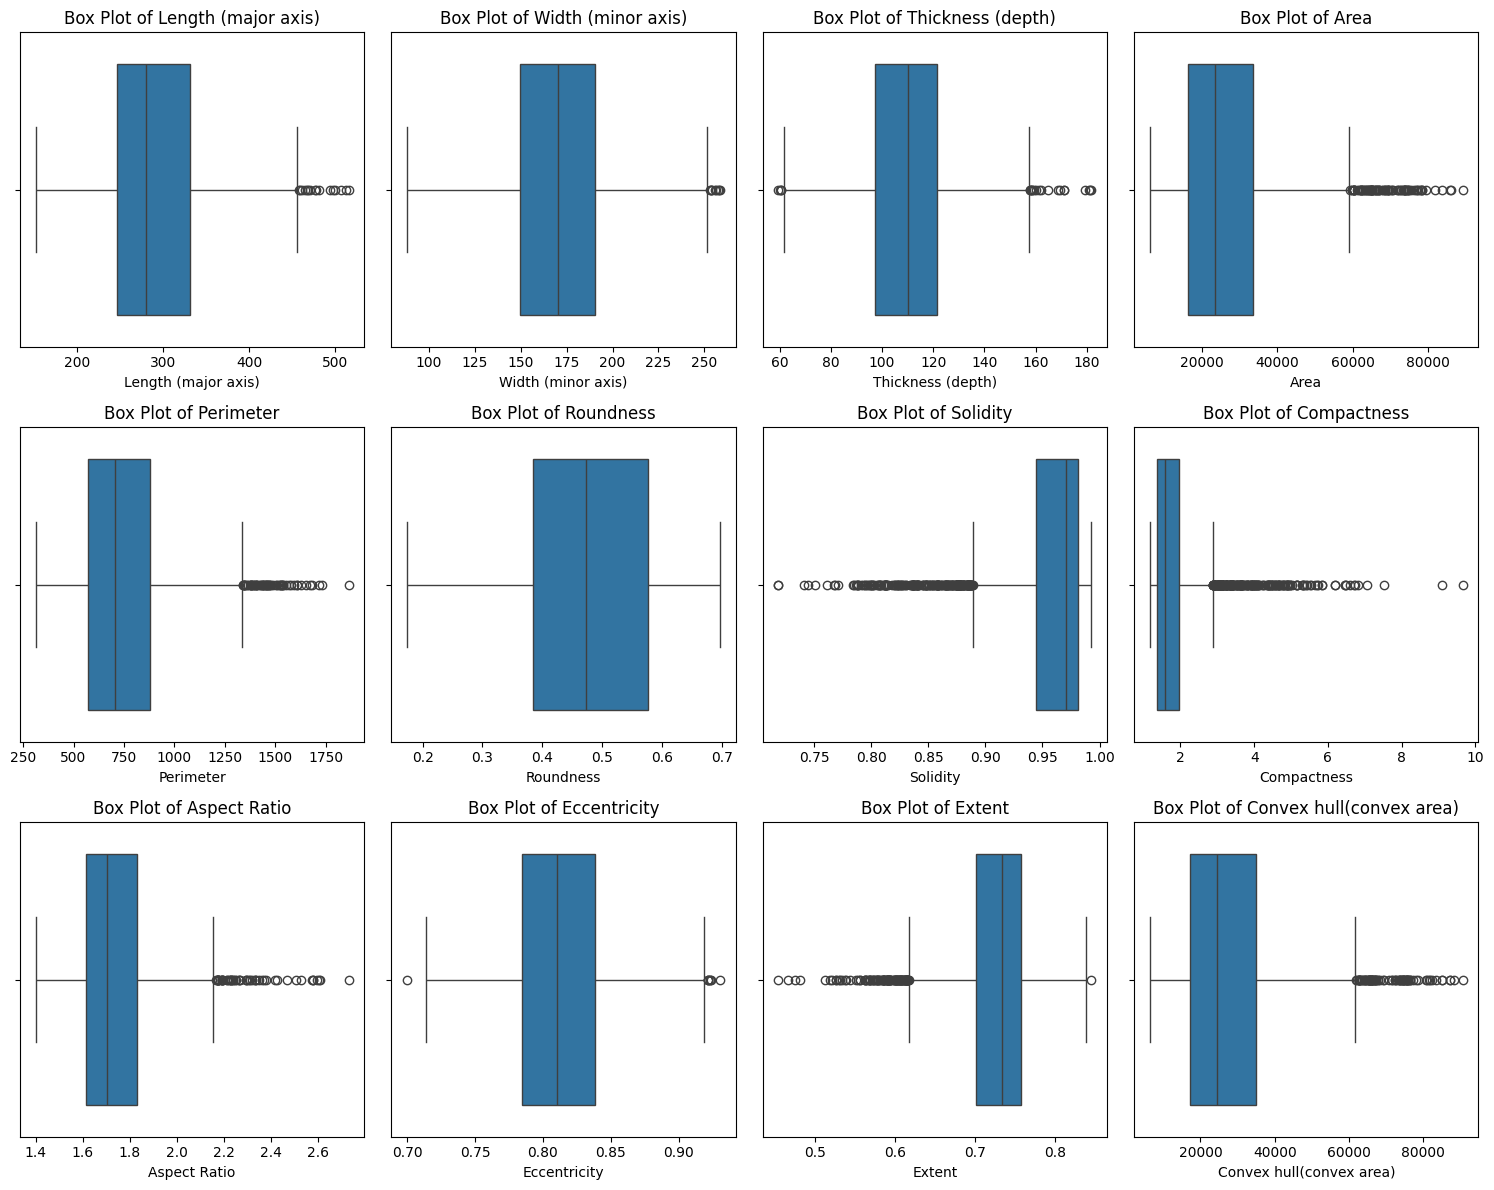

In [17]:
visualise_outliers(data)

In [18]:
def handle_outliers(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    for column in numeric_data.columns:
        skewness = numeric_data[column].skew()
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)
        
        if abs(skewness) > 0.5:
            median = numeric_data[column].median()
            numeric_data.loc[outliers, column] = median
        else:
            mean = data[column].mean()
            numeric_data.loc[outliers, column] = mean

    numeric_data['Type'] = data['Type']
    return numeric_data


In [19]:
no_outliers = handle_outliers(data.copy())

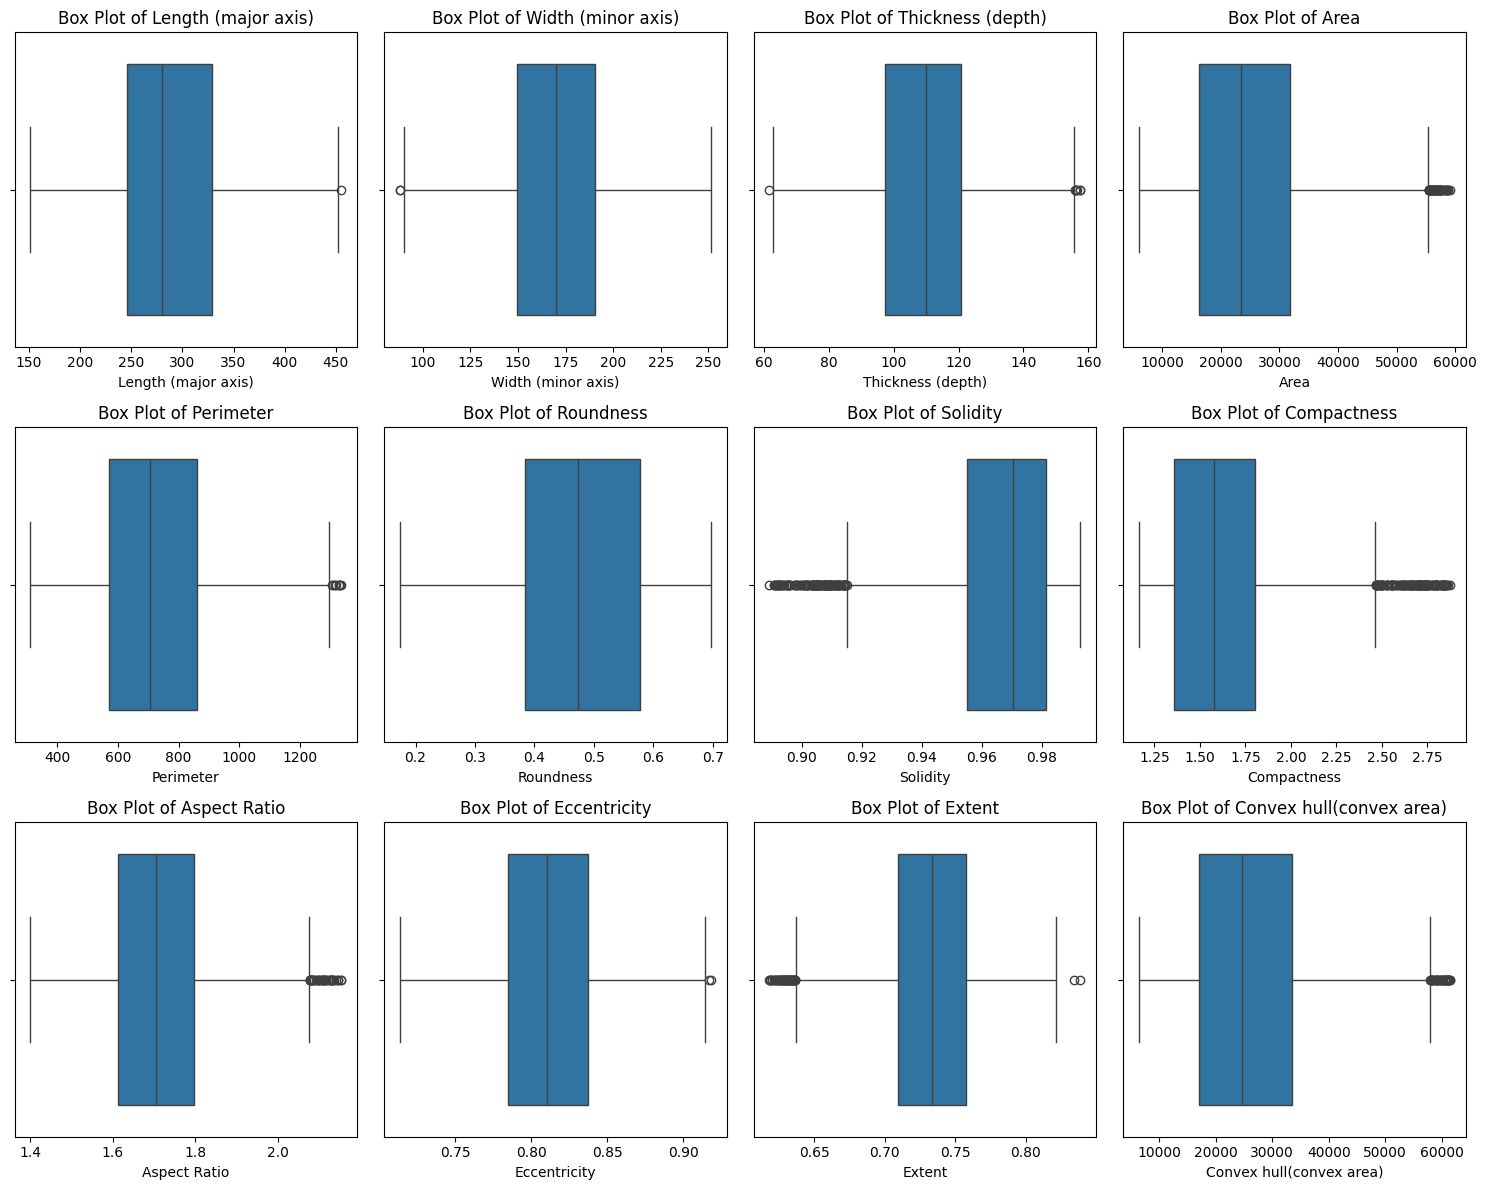

In [20]:
visualise_outliers(no_outliers)

#### Clean Data

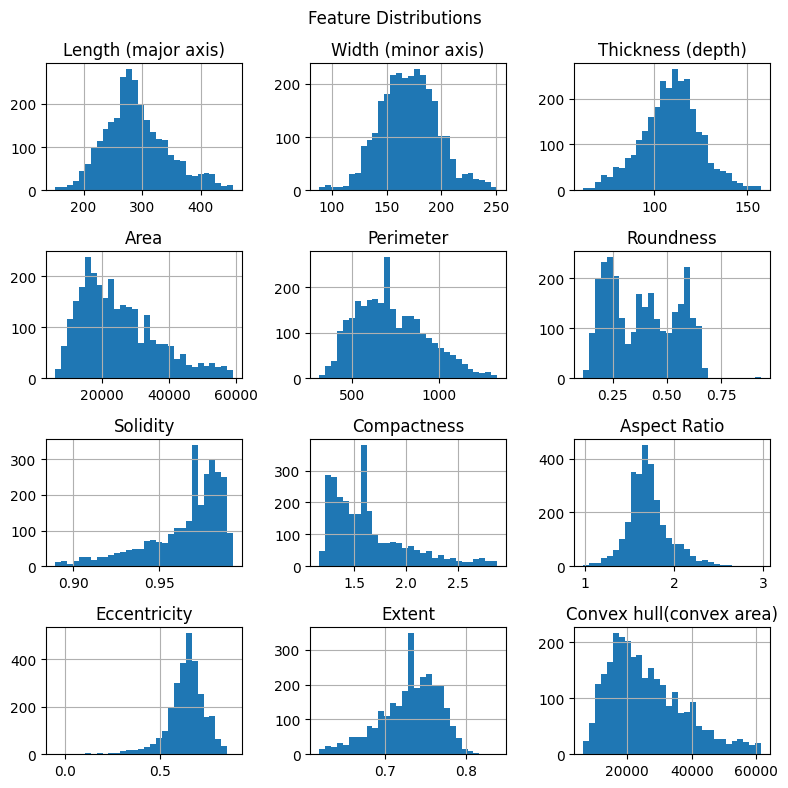

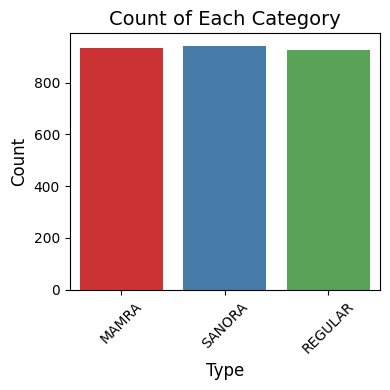

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

In [21]:
data_cleaned = handle_outliers(data.copy())
data_cleaned = handle_missing(data_cleaned.copy())

plot_histograms(data_cleaned)
get_num_categories(data_cleaned)
data_cleaned['Type'].value_counts()

In [22]:
data_cleaned.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

In [23]:
data_cleaned.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,290.414667,170.613525,109.051255,25092.306993,727.050674,0.387219,0.965126,1.639954,1.710296,0.638005,0.730551,26211.005708
std,54.051222,26.465483,15.821893,11418.218408,202.168168,0.156825,0.022191,0.368821,0.239341,0.103639,0.036988,11775.161268
min,151.335266,88.050529,61.589066,6037.000000,311.563489,0.112487,0.889311,1.164469,0.975345,-0.051195,0.618295,6355.000000
25%,255.005066,152.447192,99.374183,16211.500000,571.730009,0.239763,0.954939,1.357398,1.562131,0.590206,0.709183,17088.500000
50%,284.225861,170.482086,109.705378,23440.500000,707.487369,0.381137,0.970422,1.576412,1.687237,0.648725,0.733720,24589.000000
75%,320.930542,187.916994,118.846516,31870.500000,862.432063,0.536187,0.981484,1.799806,1.813709,0.696006,0.757518,33470.500000
max,455.570923,251.321655,157.605255,59072.000000,1337.276253,0.935513,0.992889,2.874083,2.981810,0.887529,0.838823,61502.500000


#### Normalise Input

In [24]:
def normalise(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    type_column = data['Type']
    numerical_columns = data.drop(columns=['Type'])
    data_scaled = scaler.fit_transform(numerical_columns)

    data_scaled = pd.DataFrame(data_scaled, columns=numerical_columns.columns)
    
    data_scaled['Type'] = type_column
    return data_scaled

In [25]:
data_scaled = normalise(data_cleaned.copy())
data_scaled.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.312661,0.323921,0.274139,0.811683,0.171850,0.152029,0.470012,0.285214,0.306134,MAMRA
1,0.574596,0.895061,0.693742,0.320562,0.360161,0.198377,0.656442,0.255833,0.207993,0.570572,0.172578,0.321148,MAMRA
2,0.713794,0.865849,0.668715,0.308278,0.326972,0.118370,0.752660,0.189109,0.314421,0.706906,0.296221,0.304438,MAMRA
3,0.724218,0.886333,0.669988,0.311898,0.340899,0.116186,0.735687,0.220231,0.309709,0.702002,0.304112,0.308808,MAMRA
4,0.443880,0.870333,0.475590,0.245706,0.305426,0.223007,0.599920,0.271948,0.134050,0.431789,0.437609,0.248171,MAMRA


#### Encode Almond Types

In [26]:
type_encodings = {
    'REGULAR': 0,
    'MAMRA': 1,
    'SANORA': 2
}
final_data = data_scaled.copy()
final_data['Type'] = data_scaled['Type'].map(type_encodings)

final_data['Type'].value_counts()

Type
2    943
1    933
0    927
Name: count, dtype: int64

In [27]:
final_data.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.312661,0.323921,0.274139,0.811683,0.171850,0.152029,0.470012,0.285214,0.306134,1
1,0.574596,0.895061,0.693742,0.320562,0.360161,0.198377,0.656442,0.255833,0.207993,0.570572,0.172578,0.321148,1
2,0.713794,0.865849,0.668715,0.308278,0.326972,0.118370,0.752660,0.189109,0.314421,0.706906,0.296221,0.304438,1
3,0.724218,0.886333,0.669988,0.311898,0.340899,0.116186,0.735687,0.220231,0.309709,0.702002,0.304112,0.308808,1
4,0.443880,0.870333,0.475590,0.245706,0.305426,0.223007,0.599920,0.271948,0.134050,0.431789,0.437609,0.248171,1


### Neural Network

#### Imports & Setup

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split

In [137]:
class AlmondClassifier(nn.Module):
    def __init__(self, activation=nn.ReLU(), seed=21446459, in_features=12, num_hidden_layers=3, hidden_neurons=64, out_categories=3):
        super(AlmondClassifier, self).__init__()
        np.random.seed(seed)
        torch.manual_seed(seed)

        self.epochs = 100
        self.losses = []
        self.train_accuracy = []
        self.test_accuracy = []
        self.predictions = []
        self.criterion = nn.CrossEntropyLoss()
        self.optimiser = any
        
        self.num_hidden = num_hidden_layers
        layers = []
        
        layers.append(nn.Linear(in_features, hidden_neurons))
        layers.append(activation)
        
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(activation)
            
        layers.append(nn.Linear(hidden_neurons, out_categories))
        
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.layers(x)

    def train_classifier(self, train, train_exp, epochs=500, lr=0.001, optim="adam"):
        # print(self.parameters)
        self.optimiser = torch.optim.Adam(self.parameters(), lr=lr)
        if(optim != "Adam"):
            self.optimiser = torch.optim.Rprop(self.parameters(), lr=lr)
        
        self.epochs = epochs
        for ep in range(self.epochs):
            outcomes = self.forward(train)
            loss = self.criterion(outcomes, train_exp)
            
            with torch.no_grad():
                predicted_classes = torch.argmax(outcomes, dim=1)
                self.losses.append(loss.detach().numpy())
                self.train_accuracy.append(np.sum(predicted_classes.numpy() == train_exp.numpy()) / predicted_classes.shape[0])
            
            self.optimiser.zero_grad()
            loss.backward()
            self.optimiser.step()

    def show_training_results(self):
        for ep in range(self.epochs):
            if ep % 5 == 0:
                print(f'Epoch: {ep} | Loss: {self.losses[ep]} | Accuracy: {self.train_accuracy[ep]}')
                
        plt.plot(range(self.epochs), self.losses)
        plt.ylabel("loss/error")
        plt.xlabel("Epoch")

    def testing_nn_accuracy(self, test, test_expected):
        # self.eval()
        outcomes = self.forward(test)
        predicted_classes = torch.argmax(outcomes, dim=1)
        
        return np.sum(predicted_classes.numpy() == test_expected.numpy()) / predicted_classes.shape[0]
        
        

#### Main

Epoch: 0 | Loss: 1.1011621952056885 | Accuracy: 0.3434433541480821
Epoch: 5 | Loss: 1.088447093963623 | Accuracy: 0.39562890276538804
Epoch: 10 | Loss: 1.0709342956542969 | Accuracy: 0.4223907225691347
Epoch: 15 | Loss: 1.0278695821762085 | Accuracy: 0.4768064228367529
Epoch: 20 | Loss: 0.9770272374153137 | Accuracy: 0.5089206066012489
Epoch: 25 | Loss: 0.9411619901657104 | Accuracy: 0.5365744870651205
NN Testing Accuracy: 0.5561497326203209


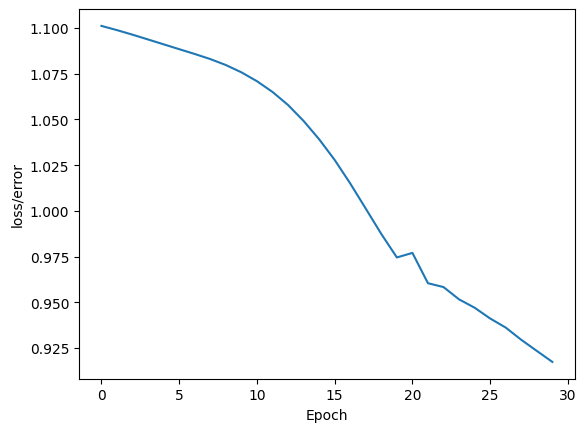

In [124]:
#Split data
# If bad split before pre-processing data
X = final_data.drop('Type', axis=1)
y = final_data['Type']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21446459)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Train
classifier = AlmondClassifier(seed=21446459, num_hidden_layers=1, hidden_neurons=60)
classifier.train_classifier(X_train, y_train, epochs=30)
classifier.show_training_results()

#Test
accuracy = classifier.testing_nn_accuracy(X_test, y_test)
print(f'NN Testing Accuracy: {accuracy}')

### Hyperparameter Optimisation

In [138]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'optimizer__lr': [0.001, 0.01, 0.1, 0.2, 0.3],
    'module__activation': [nn.ReLU(), nn.Sigmoid(), nn.Tanh(), nn.LeakyReLU(negative_slope=0.1)],
    # 'module__hidden_neurons': [36,48,60]
    # 'module__num_hidden_layers': [2,3,4],
}


def optimise_hp(model, param_grid, train_feat, train_exp):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
    return grid.fit(train_feat, train_exp)


#### Adam

Fitting 5 folds for each of 20 candidates, totalling 100 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.0517       0.4766        0.9911  0.0500
      2        0.9607       0.4788        0.9631  0.0371
      3        0.9046       0.4900        1.0116  0.0325
      4        0.9070       0.5033        0.9510  0.0350
      5        0.8754       0.5011        0.9613  0.0350
      6        0.8865       0.5145        0.9160  0.0392
      7        0.8771       0.5256        0.9342  0.0379
      8        0.8508       0.4900        1.0155  0.0340
      9        0.8559       0.4722        0.9885  0.0347
     10        0.8454       0.5390        0.8884  0.0410
     11        0.7811       0.5679        0.8694  0.0745
     12        0.8095       0.5612        0.8795  0.0431
     13        0.8016       0.5145        0.9189  0.0385
     14        0.8055       0.5657        0.8704  0.0398
     15        0.7654     

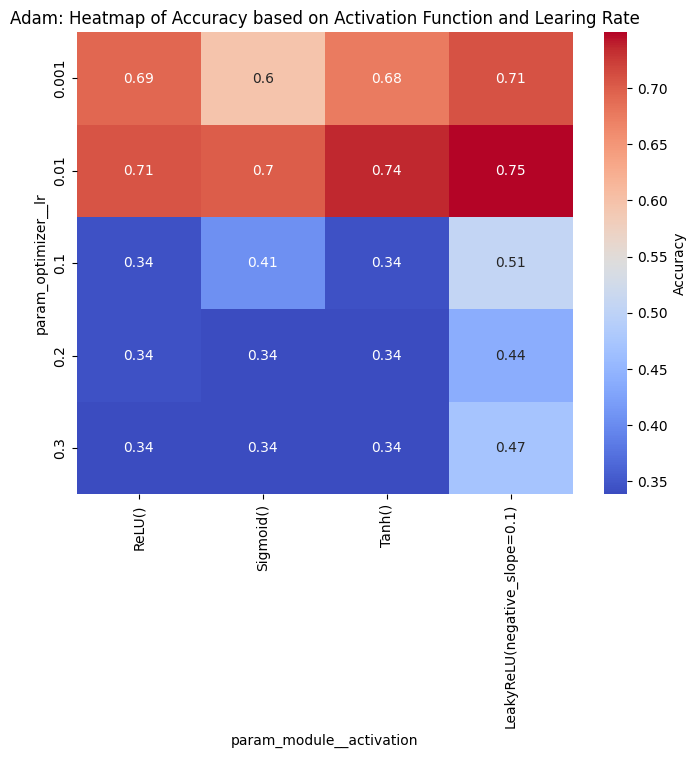

Best Training Accuracy: 0.7497782771237671
Best Params: {'module__activation': LeakyReLU(negative_slope=0.1), 'optimizer__lr': 0.01}
Testing score: 0.7023172905525846


In [139]:
modelAdam = NeuralNetClassifier(
    module=AlmondClassifier,
    criterion=nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    max_epochs=500,
)

grid_result_adam = optimise_hp(modelAdam, param_grid, X_train, y_train)

df = pd.DataFrame(grid_result_adam.cv_results_)
pivot = df.pivot(index='param_optimizer__lr', columns='param_module__activation', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="coolwarm", cbar_kws={'label': 'Accuracy'})
plt.title('Adam: Heatmap of Accuracy based on Activation Function and Learing Rate')
plt.show()
print(f'Best Training Accuracy: {grid_result_adam.best_score_}')
print(f'Best Params: {grid_result_adam.best_params_}')

best_classifier_adam = grid_result_adam.best_estimator_
adam_test_score = best_classifier_adam.score(X_test, y_test)
print(f'Testing score: {adam_test_score}')



#### RProp

Fitting 5 folds for each of 20 candidates, totalling 100 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.0948       0.4744        1.0827  0.0422
      2        1.0466       0.4677        0.9910  0.0479
      3        0.9557       0.5122        0.9730  0.0424
      4        0.9359       0.5100        0.9650  0.0470
      5        0.9269       0.5100        0.9616  0.0513
      6        0.9193       0.5100        0.9582  0.0462
      7        0.9107       0.4922        0.9564  0.0421
      8        0.9037       0.4989        0.9540  0.0452
      9        0.8982       0.5145        0.9477  0.0622
     10        0.8928       0.5145        0.9443  0.0486
     11        0.8882       0.5145        0.9413  0.0505
     12        0.8844       0.5145        0.9394  0.0426
     13        0.8817       0.5167        0.9372  0.0489
     14        0.8788       0.5189        0.9344  0.0477
     15        0.8754     

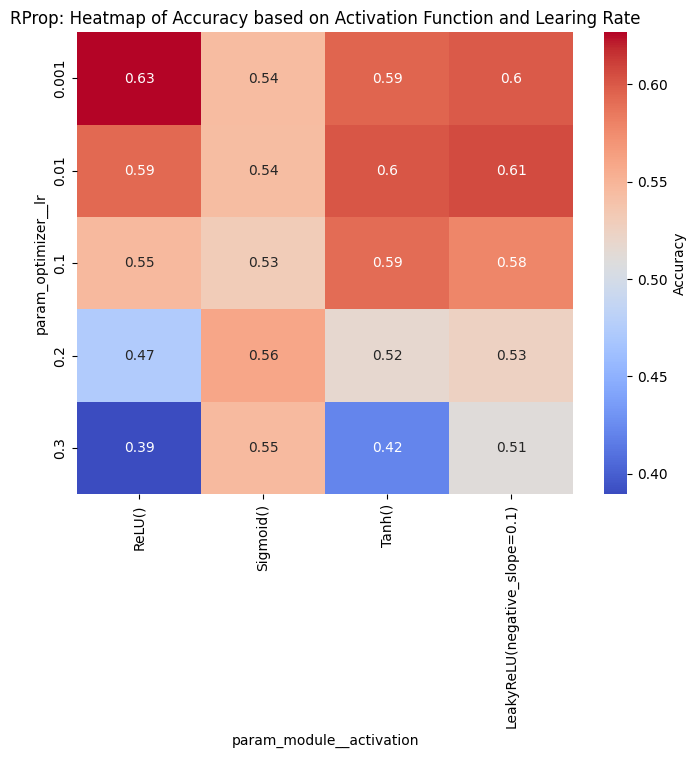

Best Training Accuracy: 0.6266982182628063
Best Params: {'module__activation': ReLU(), 'optimizer__lr': 0.001}
Testing score: 0.6060606060606061


In [140]:
modelRprop= NeuralNetClassifier(
    module=AlmondClassifier,
    criterion=nn.CrossEntropyLoss,
    optimizer=torch.optim.Rprop,
    max_epochs=500,
)

grid_result_rprop = optimise_hp(modelRprop, param_grid, X_train, y_train)

df = pd.DataFrame(grid_result_rprop.cv_results_)
pivot = df.pivot(index='param_optimizer__lr', columns='param_module__activation', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="coolwarm", cbar_kws={'label': 'Accuracy'})
plt.title('RProp: Heatmap of Accuracy based on Activation Function and Learing Rate')
plt.show()
print(f'Best Training Accuracy: {grid_result_rprop.best_score_}')
print(f'Best Params: {grid_result_rprop.best_params_}')

best_classifier_rprop = grid_result_rprop.best_estimator_
rprop_test_score = best_classifier_rprop.score(X_test, y_test)
print(f'Testing score: {rprop_test_score}')

### Statistical tests

### Hybrid Learning